# Ensayo SVM
## Nombre: Victor Rene Pérez Mayen
## Carnet: 19005180


In [5]:
import tensorflow as tf, numpy as np, matplotlib.pyplot as plt, pandas as pd, sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.externals import joblib
from scipy import stats
from sklearn.externals.six import StringIO
from IPython.display import display, Math, Latex
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn import datasets

### Videos de referencia para el ensayo:
#### https://www.youtube.com/watch?v=VWwb3IAB6Rc&feature=youtu.be
#### https://www.youtube.com/watch?v=geI6lM5iOl0&feature=youtu.be
#### https://www.youtube.com/watch?v=01hse_MOx0g&feature=youtu.be

### Hipótesis de SVM

##### Referencia: https://www.youtube.com/watch?v=VWwb3IAB6Rc&feature=youtu.be

**Support Vector Machine es un algorítmo de ML sirve para separar dos categorias. Se selecciona la mejor recta y a esta la llamaremos recta de separación. Para seleccionar el margen del algorítmo de primero se buscan los vectores que estén más cerca de recta de separación, recibiendo asi el nominativo de vectores de soporte.**

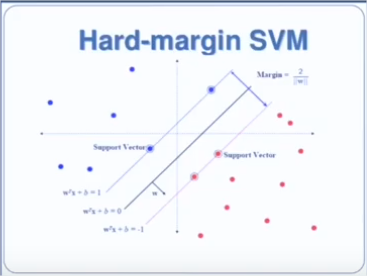

**SVM busca un hiperplano donde se tenga un margen lo más grande posible.**

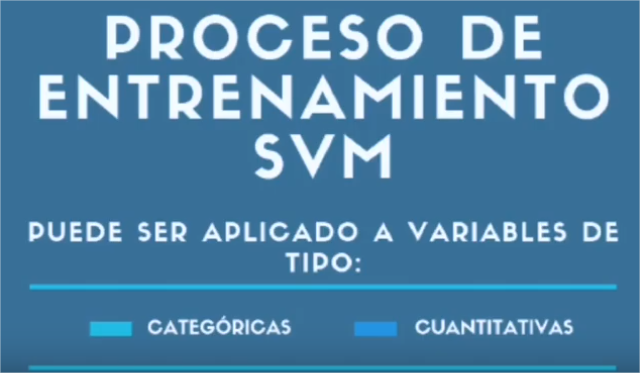

**SVM puede aplicarse a distintas variables, ya sea categóricas (incluidas las cualitativas) como cuantitativas. Su mayo aplicación es para la clasificación de texto. En caso de que se utilice con variables categóricas, se deberá realizar una conversión numérica utilizando one hot encoding; para las imágenes, se deberá de aplicar un reshape a estas y luego aplicar el algorítmo.**

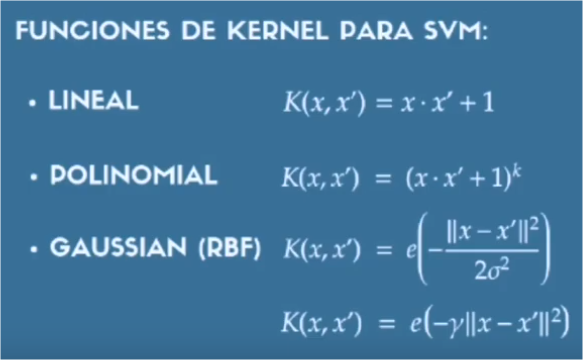

**Las funciones de Kernel para SVM se aplican cuando tengamos datos que no pueden ser separados por medio de una línea en un solo plano. Las funciones de Kernel realizan un mapeo de datos, las funciones más utilizadas son:
    -Lineal
    -Polinomial
    -Gaussiana
La función gaussiana tiene un nuevo hiperparámetro llamado "gamma", la cual nos variará el sesgo y la varianza.**

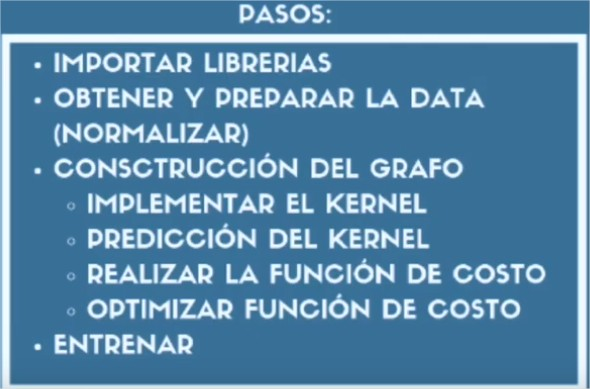

### Función de Costo

##### Referencia: https://www.youtube.com/watch?v=VWwb3IAB6Rc&feature=youtu.be

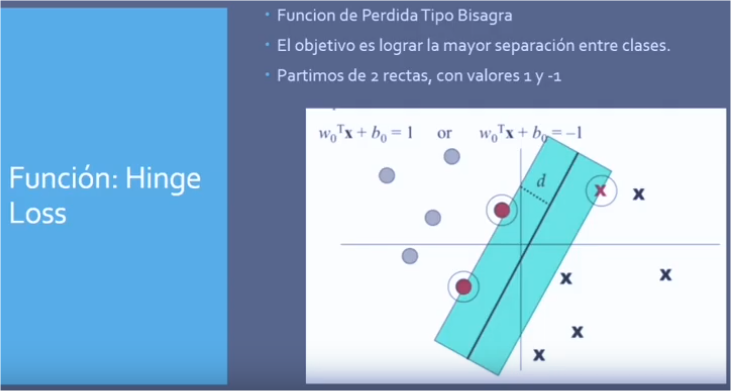

**El objetivo de la función de pérdida por tipo bisagra es lograr la mayor separación de clases separados por una línea o por un hiperplano. Se parten de dos rectar con valores iniciales de 1 y -1, estas rectas encierrarn el hiperplano que separa a las dos clases que tenemos con el fin de maximizar la distancia.**

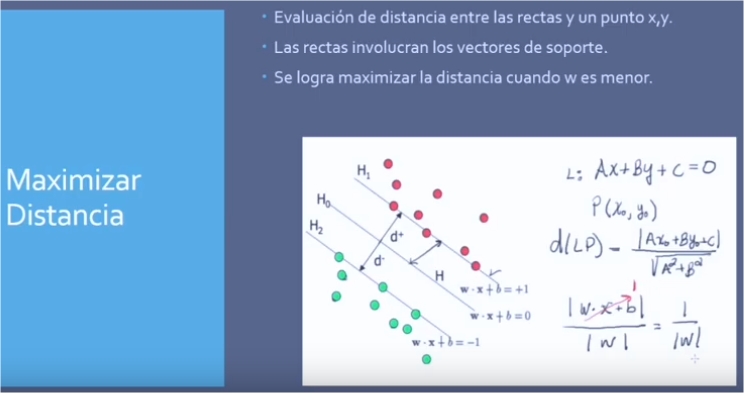

**El objetivo es maximizar la distancia posible, para ello se debe de derivar la ecuación de la distancia del hiperparámetro e igualarlo a 0. Se toma la distancia entre dos rectas y un punto en particular.**

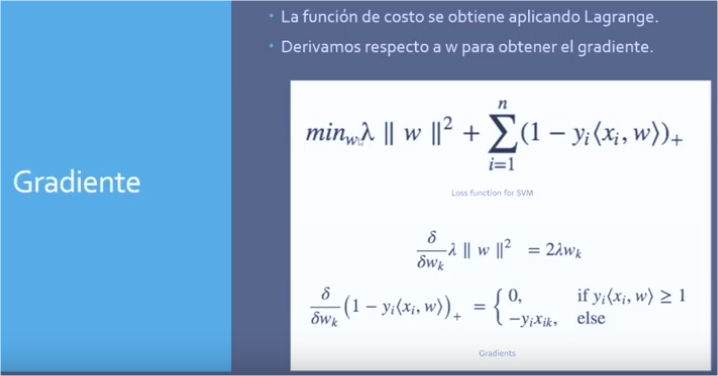

#### Función de costo:
$$\min (w) * \lambda * \left \| w^{2} \right \| + \sum_{i = 1}^{n} (1- y_{i}(x_{i},w))$$

**Para obtener el gradiente, se deriva por partes la función de costo, como se muestra en la imagen anterior.**

$$2\lambda w_{k}$$
$$\left\{\begin{matrix}
 0,&y_{i}(x_{i},w) \geqslant 1 \\ 
 -y_{i}x_{ik},& c.o.c
\end{matrix}\right.\\ $$

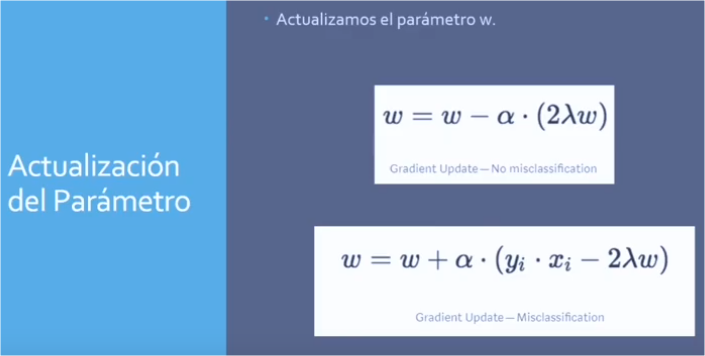

**Por último se actualiza el parámetro w dependiendo de los valores en el gradiente, obteniendo asi la función de costo para SVM.**

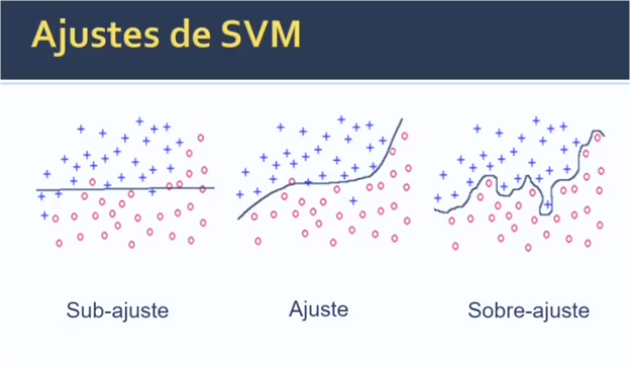

**Al momento de ajustar los vectores en clasificación binario, se puede observar que puede ocurrir diversos problemas si el ajuste no se realiza correctamente. Si tenemos underfitting, se producirá un sub-ajuste; en contraposición, si tenemos overfitting, se producirá un sobre-ajuste en la separación de las variables afectando asi al entrenamiento del modelo.**

###  Propiedades, similitudes, diferencias ,ventajas y desventajas sobre otros algoritmos y modelos

##### Referencia: https://www.youtube.com/watch?v=VWwb3IAB6Rc&feature=youtu.be

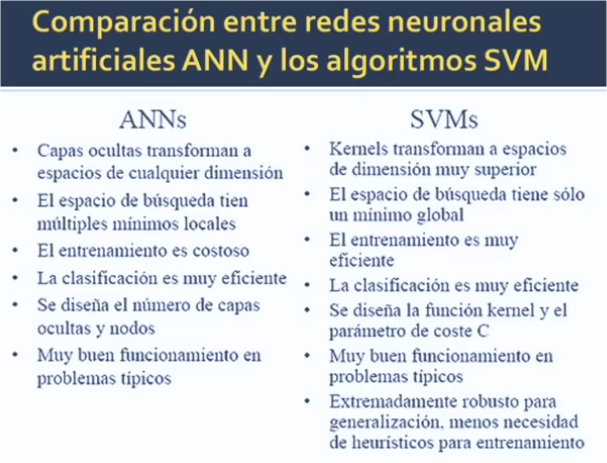

**SVM debe usarse para clasificaciones donde solo existan dos categorías, por lo que debe ser una clasificación binaria. Esto ayuda primordialmente a que el entrenamiento sea eficiente y no sea tan costoso como los algorítmos por redes neuronales.**

**Al momento de comparar los SVM con los algorítmos de regresión, cabe destacar que ambos algorítmos se utilizan para la clasificación binaria entre categorías. El objetivo del clasificador binario es encontrar la línea o curva que tenga la mayor probabilidad de predecir y/o delimitar dos categorías de datos correctamente.**

**Asi mismo, la regresión logística es una técnica que define una distribución de probabilidad sobre las variables de entrada para predecir de que lado de la gráfica estarán las variables de salida**

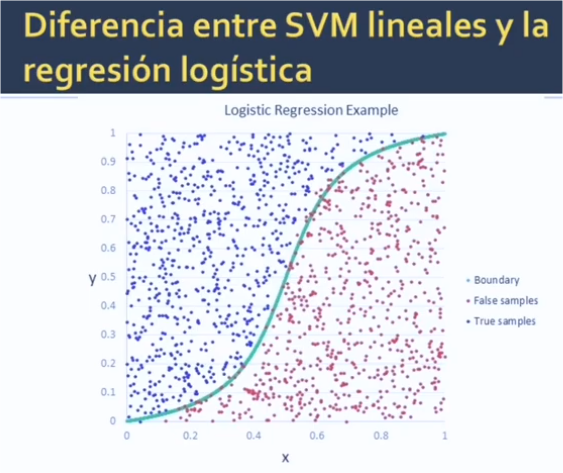

**La regresión logística trata de encontrar la línea que mejor separe las categorías, mientras que los SVM tratan de encontrar directamente la mayor separación posible entre las categorías.**

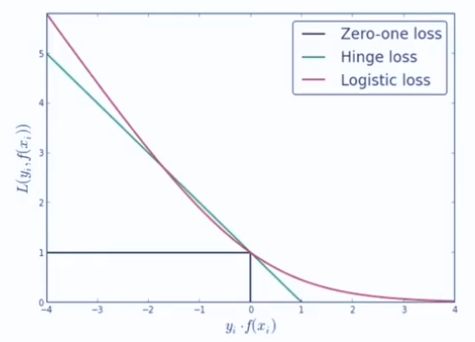

**Ventajas:**

    -Algorítmo clasificador en base a una sólida teoría.
    -Se utilizan relativamente pocos parámetros para la estimación.
    -Tiene flexibilidad, ya qye puede formular nuevas extensiones.
    
**Desventajas:**

    -La determinación de los kernels a utilizar se complica debido a la complejidad de cada uno.
    -Al ser un clasificador binario, ocurre problemas al tener más de dos clases.

###  Algoritmo de aprendizaje/entrenamiento

##### Referencia: https://www.youtube.com/watch?v=geI6lM5iOl0&feature=youtu.be

In [7]:
iris = datasets.load_iris()

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
# Largo de pétalo y ancho de pétalo
X = iris["data"][:, (2, 3)]

# Setosa
#y = np.array([1 if y == 0 else -1 for y in iris.target])

# Iris-Setosa
y = (iris["target"] == 0).astype(np.float64)

In [12]:
np.max(X), np.min(X)

(6.9, 0.1)

In [13]:
np.max(y), np.min(y), np.unique(y)

(1.0, 0.0, array([0., 1.]))

In [14]:
X.shape, y.shape

((150, 2), (150,))

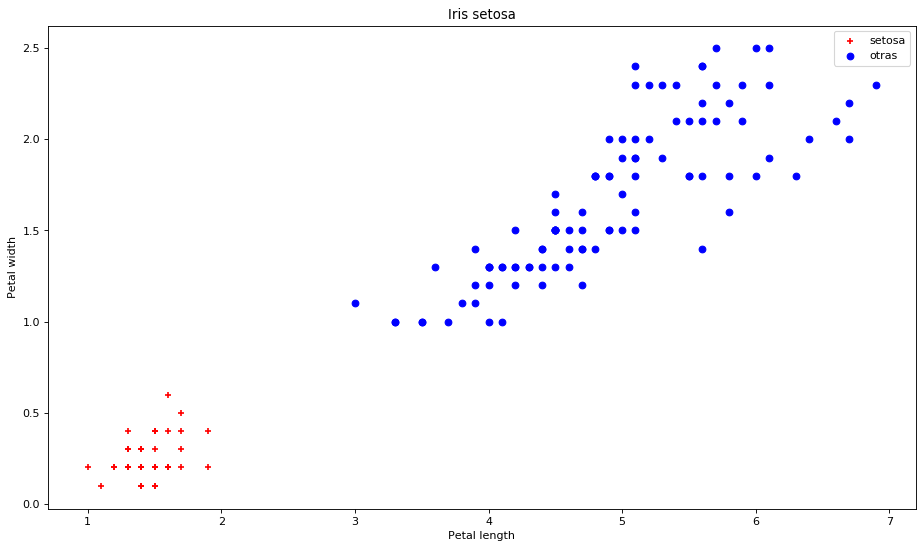

In [15]:
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'r', marker = '+', label="setosa")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'b', marker = 'o', label="otras")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.title("Iris setosa");

**Modelo de clasificación lineal en scikit-learn**

In [16]:
svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
))
svm_clf

Pipeline(memory=None,
         steps=(('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))),
         verbose=False)

In [17]:
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [18]:
svm_clf.predict(X)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
# Computar la tasa de accuracy
np.mean(np.equal(svm_clf.predict(X), y))*100

100.0

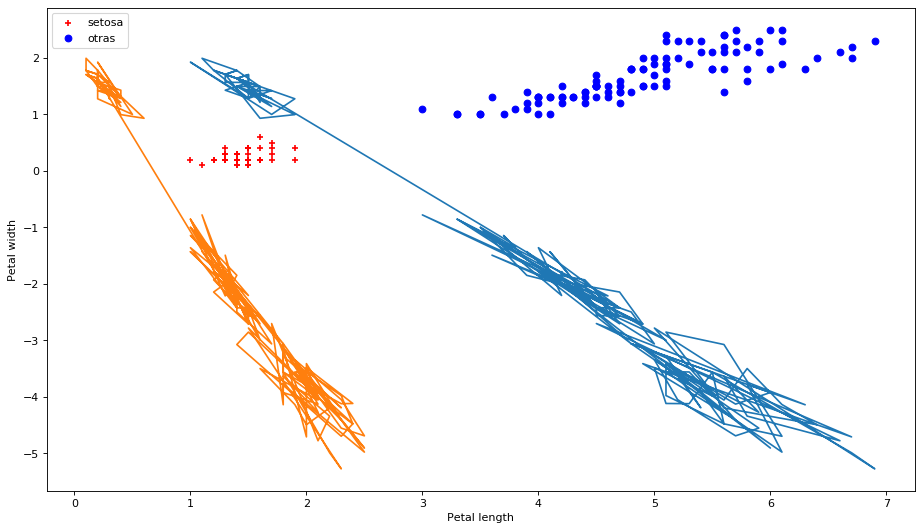

In [20]:
# Graficando la curva de decisión
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'r', marker = '+', label="setosa")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'b', marker = 'o', label="otras")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
Ybound = svm_clf.decision_function(X)
plt.plot(X, Ybound);

In [21]:
# Generando la clasificación de un elemento de X
svm_clf.predict([X[0]])

array([1.])

In [22]:
svmt = LinearSVC(C=1, loss="hinge")
svmt.fit(X, y)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [23]:
# Revisando los coeficientes
svmt.coef_, svmt.intercept_

(array([[-0.72280702, -1.03508772]]), array([2.56491228]))

In [24]:
svmt.coef_.shape, svmt.intercept_.shape

((1, 2), (1,))

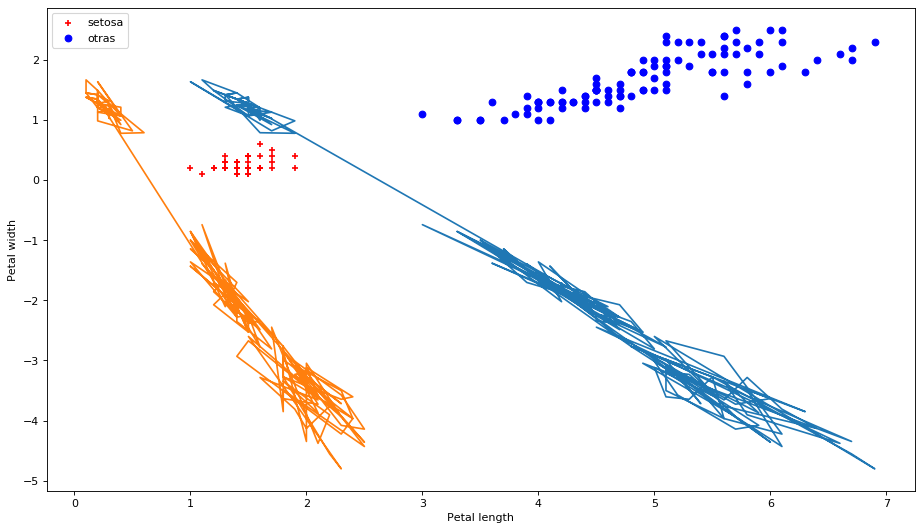

In [25]:
# Graficando los límites de decisión
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'r', marker = '+', label="setosa")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'b', marker = 'o', label="otras")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
Ybound = svmt.decision_function(X)
plt.plot(X, Ybound);

In [27]:
X.shape, y.shape

((150, 2), (150,))

In [28]:
def entrenarSVM(Xtrain, Ytrain, lr, C, epochs, tag):
    import time
    
    # Obtener features de xtrain y número de  ejemplos
    m, k = Xtrain.shape
    
    # Obtener la variable t para el algoritmo
    tTrain = np.array([1.0 if z == 1 else -1.0 for z in Ytrain])

    # Crear el grafo
    # -------------------------------------------------------------------------
    tf.reset_default_graph()
    g = tf.Graph()
    with g.as_default():
        # Creando los placeholders
        X = tf.placeholder(tf.float32, shape = (m, k), name = "X")
        y = tf.placeholder(tf.float32, shape = (m, 1), name = "y")
        t = tf.placeholder(tf.float32, shape = (m, 1), name = "t")

        # Hiperparámetros del modelo
        lr_param = tf.placeholder(tf.float32, name = "lr")
        C_param = tf.placeholder(tf.float32, name = "C")
        
        # Coeficientes de regresión de logits, incluyendo intercepto
        W = tf.Variable(tf.truncated_normal(shape = (k, 1), seed = 123), name = "W")
        b = tf.Variable(tf.truncated_normal(shape = (1, 1), seed = 123), name = "b")
        
        #W = tf.Variable(tf.constant(4., shape = [k, 1]), name = "W")
        #b = tf.Variable(tf.constant(-10., shape = [1, 1]), name = "b")
        
        # Salida del modelo
        with tf.name_scope("SVM_model"):
            svm_op = tf.add(tf.matmul(X, W), b, name = "svm_op")
            t_hat = tf.sign(svm_op, name = "t_hat")

        # Función de costo
        with tf.name_scope("FuncionCosto"):
            # Norma de los pesos
            w_norm = tf.multiply(tf.constant(0.5), tf.reduce_sum(tf.square(W)), name = "w_norm")
            # Suma de la función de pérdida "hinge"
            classif_term = tf.reduce_sum(tf.maximum(tf.constant(0.), tf.subtract(tf.constant(1.), tf.multiply(t, svm_op))), name = "classif_term")
            #classif_term = tf.losses.hinge_loss(labels = y, logits = svm_op)
            # Función de costo total
            cost = tf.add(w_norm, tf.multiply(C_param, classif_term), name = "Costo")

        # Accuracy del modelo
        with tf.name_scope("Accuracy"):
            accuracy = tf.reduce_mean(tf.cast(tf.equal(t_hat, t), tf.float32), name = "accuracy")
        
        # Gradient Descent Optimizer 
        with tf.name_scope("GradientDes.Optimizer"):
            trainstep = tf.train.GradientDescentOptimizer(lr_param).minimize(cost) 

        with tf.name_scope("Summaries"):
            # Summary de costo para el TensorBoard
            costSummary = tf.summary.scalar(name='fCosto', tensor = cost)
            # Summary de precisión para el TensorBoard
            accuracySummary = tf.summary.scalar(name='accuracySummary', tensor = accuracy)
            # Agrupar los sumaries
            summaries = tf.summary.merge_all()
            
        # Global Variables Initializer 
        init = tf.global_variables_initializer() 
        
    # Entrenamiento del modelo
    # -------------------------------------------------------------------------

    start = time.time()
    with tf.Session(graph = g) as sess:
        
        # Crear el objeto writer
        writer = tf.summary.FileWriter('./board/lr=%0.6f, C=%0.6f, epochs=%d, <%s>' % (lr, C, epochs, tag), sess.graph)
        
        # Inicializar variables
        sess.run(init)
        
        for epoch in range(epochs):
            # Ejecutar batch gradient descent
            _, c_, acc_, summ_ = sess.run([trainstep, cost, accuracy, summaries], 
                                  feed_dict = {X : Xtrain, y : Ytrain.reshape((m, 1)), t : tTrain.reshape((m, 1)), lr_param : lr, C_param : C})
            
            # Agregar summaries al tablero
            writer.add_summary(summ_, epoch + 1)
            
            if (epoch + 1) % round(epochs*0.1) == 0:
                print("Epoch: %d, \t accuracy = %0.2f, \t costo = %0.4f" % (epoch+1, acc_, c_))
                
        # Cerrar el writer del summary
        writer.close()
                
        # Obtener los parámetros finales para devolverlos
        w_, b_ = sess.run([W, b])
        
    end = time.time()
    print("Tiempo transcurrido: %0.2f segundos" % (end-start))
    
    # Devolver los parámetros
    return w_, b_

In [29]:
def grafSVM(X, y, w, b): 
    #fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'r', marker = '+', label="setosa")
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'b', marker = 'o', label="otras")
    plt.legend()
    plt.title("Iris setosa")
    
    grillaX = np.array([d[0] for d in X])
    m_ = -w[0,0] / w[1,0]
    b_ = -b[0] / w[1,0]
    yDesBound = b_ + m_*grillaX
    plt.plot(grillaX, yDesBound, 'k-', label = "Límite de decisión")

In [35]:
n = 200
# pos
X1 = np.random.uniform(low = 3., high = 5., size = (n, 2))
Y1 = np.ones(n)
# neg
X2 = np.random.uniform(low = 0, high = 2, size = (n, 2))
Y2 = np.zeros(n)
# Comb

In [36]:
XsimData = np.append(X1, X2, 0)
YsimData = np.append(Y1, Y2, 0)

XsimData.shape, YsimData.shape

((400, 2), (400,))

C:\Users\Jose\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


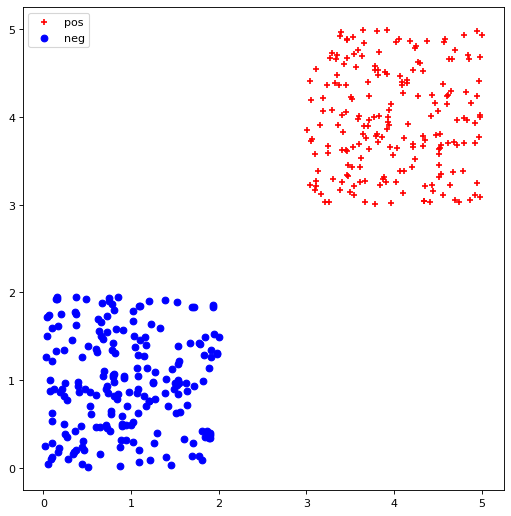

In [37]:
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(XsimData[YsimData == 1, 0], XsimData[YsimData == 1, 1], c = 'r', marker = '+', label="pos")
plt.scatter(XsimData[YsimData == 0, 0], XsimData[YsimData == 0, 1], c = 'b', marker = 'o', label="neg")
plt.legend();
plt.axes().set_aspect("equal")

In [39]:
# Datos de simulación
X1 = np.arange(-4, 5)
Y = 1.0 * ((X1 > -3) & (X1 < 3))
X1, Y

(array([-4, -3, -2, -1,  0,  1,  2,  3,  4]),
 array([0., 0., 1., 1., 1., 1., 1., 0., 0.]))

In [40]:
X1 ** 2

array([16,  9,  4,  1,  0,  1,  4,  9, 16], dtype=int32)

In [41]:
# Agregamos una feature polinomial para que el conjunto sea separable
X2 = np.hstack((np.expand_dims(X1, axis=1), (X1 ** 2).reshape((X1.shape[0], 1))))
X2

array([[-4, 16],
       [-3,  9],
       [-2,  4],
       [-1,  1],
       [ 0,  0],
       [ 1,  1],
       [ 2,  4],
       [ 3,  9],
       [ 4, 16]])

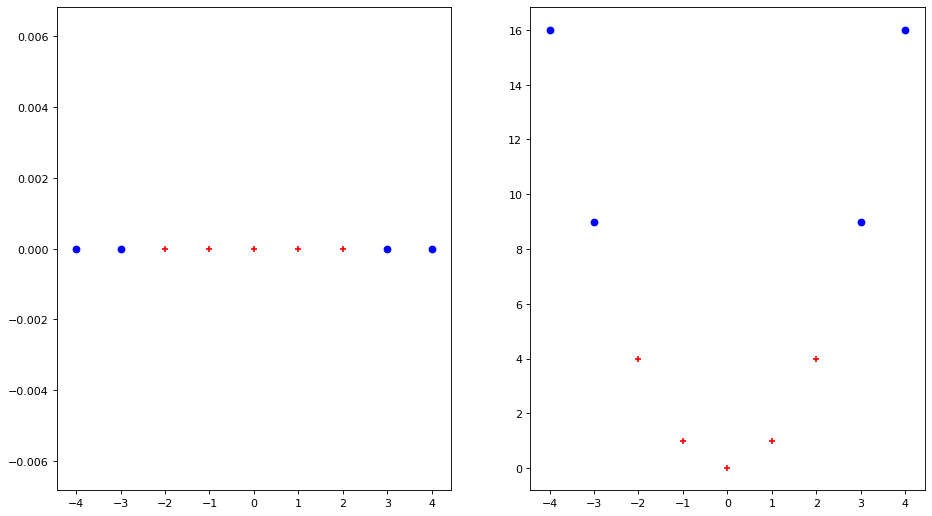

In [42]:
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.scatter(X1[Y == 1], np.zeros_like(X1[Y == 1]), c = 'r', marker = '+', label="pos")
plt.scatter(X1[Y == 0], np.zeros_like(X1[Y == 0]), c = 'b', marker = 'o', label="neg")
plt.subplot(1,2,2)
plt.scatter(X2[Y == 1, 0], X2[Y == 1, 1], c = 'r', marker = '+', label="pos")
plt.scatter(X2[Y == 0, 0], X2[Y == 0, 1], c = 'b', marker = 'o', label="neg");

In [44]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.power(x - landmark, 2))

In [45]:
# Nuevas features con landmarks en x = -2 y x = 1
gamma_ = 0.3
f1 = gaussian_rbf(X1, -2, gamma_)
f2 = gaussian_rbf(X1, 1, gamma_)
# Matriz de features
F = np.vstack((f1, f2)).T

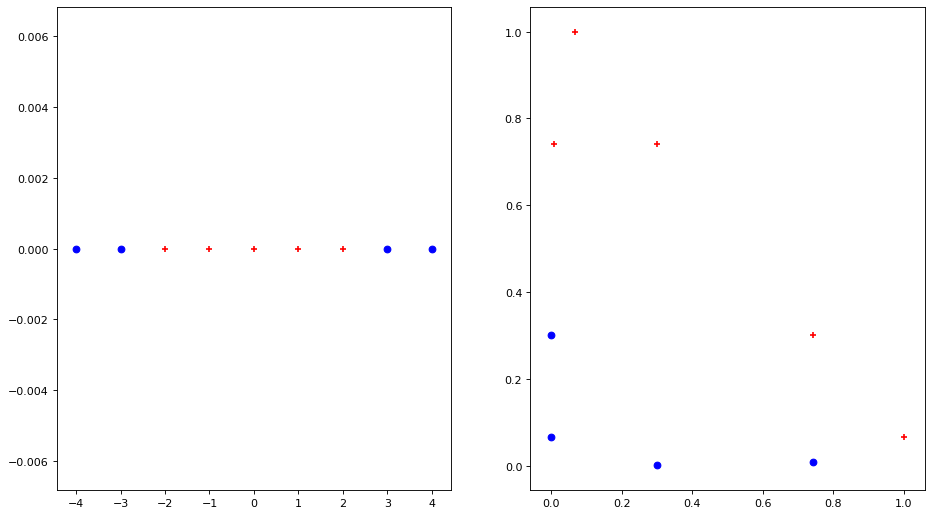

In [46]:
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.scatter(X1[Y == 1], np.zeros_like(X1[Y == 1]), c = 'r', marker = '+', label="pos")
plt.scatter(X1[Y == 0], np.zeros_like(X1[Y == 0]), c = 'b', marker = 'o', label="neg")
plt.subplot(1,2,2)
plt.scatter(F[Y == 1, 0], F[Y == 1, 1], c = 'r', marker = '+', label="pos")
plt.scatter(F[Y == 0, 0], F[Y == 0, 1], c = 'b', marker = 'o', label="neg");

In [48]:
X1

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [49]:
gaussian_rbf(X1, landmark=X1, gamma=0.3)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

###   Kernel-trick/basis functions

##### Referencia: 
https://www.youtube.com/watch?v=geI6lM5iOl0&feature=youtu.be

https://www.youtube.com/watch?v=01hse_MOx0g&feature=youtu.be

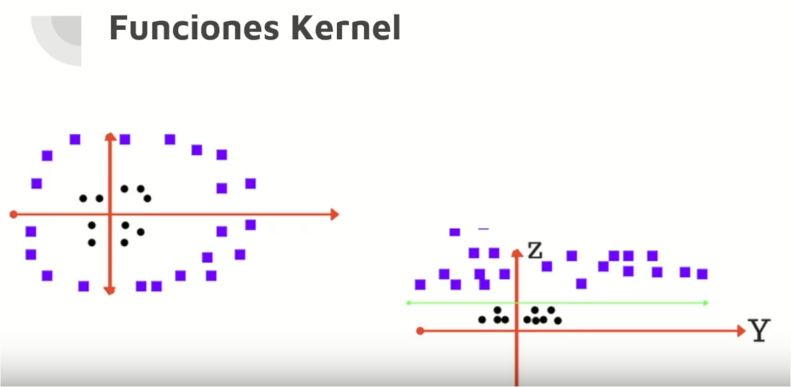

**Si nuestra información no puede ser trabajada para poder separarse linealmente, como por ejemplo si los datos están dispersos en forma circular, para estos casos que no se puede separar linealmente la información es necesario tener una versión generalizada de SVM que pueda emplearse tanto para formas lineales, circulares, o cualquier forma que se tenga, con la unica finalidad sea encontrar un limite que tome las decisiones optimas que dividan la información en clases.**

**Para entender de mejor manera se definira el siguiente teorema:**


### Teorema de Mercer:

**Dice que si una función $K(a, b)$ satisface todas las restricciones llamadas restricciones de mercer, entonces existe una función que mapea $a$ y $b$ en una dimensión más alta.**

**Si cumple con la restricciones del teorema de Mercer, es un método que usa un clasificador lineal para determinar puntos de datos no lineales. Matemáticamente, aplicando el teorema de Mercer, que mapea puntos de datos de entrada no lineales en una dimensión más alta donde pueden ser linealmente separables. Y el núcleo es una función que realmente realiza la tarea anterior para nosotros. Existen diferentes tipos de kernel, como "lineal", "polinomial", "función de remarcado", etc. La selección del kernel correcto que mejor se adapte a los datos se obtiene mediante validación cruzada.**

**Un kernel ($K$) es una función que devuelve el resultado del producto punto entre dos vectores realizado en un nuevo espacio dimensional distinto al espacio original en el que se encuentran los vectores. Aunque no se ha entrado en detalle en las fórmulas matemáticas empleadas para resolver el problema de optimización, esta contiene un producto punto. Si se sustituye este producto punto por un kernel, se obtienen directamente los vectores soporte en la dimensión correspondiente al kernel. Ha esto se le suele conocer como kernel trick, porque, con solo una ligera modificación del problema original, gracias a los kernels, se puede obtener el resultado para cualquier dimensión. Existen multitud de kernels distintos, algunos de los más utilizados son:**

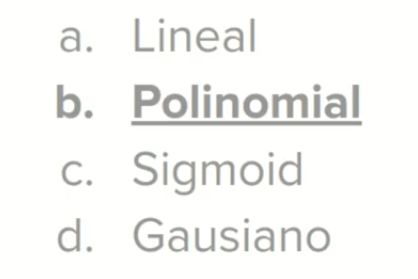